# A. Unsupervised Learning (非監督式學習)
* 本組使用之兩張衛星影像為 IKONOS 衛星所拍攝，大小為7200*6000，拍攝地區為時下最流行之中國武漢市 (漢陽區)。拍攝時間分別為2002年2月和2009年6月，為兩張多光譜影像且包含4個波段（B、G、R、NIR）。

### 下圖為4波段組成之偽彩色影像 (2002年)
<img src="hanyang2002.jpg" align="left"/>

### 下圖為4波段組成之偽彩色影像 (2009年)
<img src="hanyang2009.jpg" align="left"/>

## 1. 將兩張多光譜影像匯入 ArcGIS Pro 以非監督式學習進行影像分類 (9種類別)。

### 下圖為非監督式分類後之影像 (2002年)
<img src="unsup2002.png" align="left"/>

### 下圖為非監督式分類後之影像 (2009年)
<img src="unsup2009.png" align="left"/>

* 然而非監督式學習進行影像分類的效果略顯粗糙，因此本組將於下方介紹監督式學習。

# B. Supervised Learning (監督式學習)
* 進行影像分類前以人工判斷挑選出具代表性的訓驗樣本，再進行監督式學習。

### 下圖為監督式分類後之影像 (2002年)
<img src="super2002.png" align="left"/>

### 下圖為監督式分類後之影像 (2009年)
<img src="super2009.png" align="left"/>

# C. Confusion Matrix (變遷矩陣/混淆矩陣)

In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [2]:
# read the labels of two classified images from the csv matrix

df1 = pd.read_csv('m2002.csv')
df2 = pd.read_csv('m2009.csv')

In [3]:
data1=np.array(df1)
data2=np.array(df2)

In [4]:
data_2002 = data1.reshape(1920)
data_2009 = data2.reshape(1920)

In [5]:
data_2002

array([0, 0, 0, ..., 8, 8, 8], dtype=int64)

In [6]:
data_1 = pd.Series(data_2002)
data_2 = pd.Series(data_2009)

In [7]:
# normalize each element in the matrix (sum of row equals to 1)

df_confusion = pd.crosstab(data_2002, data_2009, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion[3]=0
df_cal = df_confusion[[0,1,2,3,4,5,6,7,8,"All"]]
all_value = df_confusion['All']
c_name=[0,1,2,3,4,5,6,7,8,'All']
df_correct = df_cal
for i in c_name:
    df_correct[i] = df_cal[i]/all_value
df_correct

Predicted,0,1,2,3,4,5,6,7,8,All
Actual,,,,,,,,,,
0,0.602339,0.001462,0.054094,0.0,0.008772,0.074561,0.061404,0.076023,0.121345,1.0
1,0.000000,0.461538,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.461538,1.0
2,0.061069,0.000000,0.916031,0.0,0.000000,0.003817,0.011450,0.007634,0.000000,1.0
3,0.258333,0.025000,0.000000,0.0,0.000000,0.208333,0.125000,0.225000,0.158333,1.0
4,0.042254,0.000000,0.000000,0.0,0.887324,0.014085,0.056338,0.000000,0.000000,1.0
5,0.068966,0.000000,0.000000,0.0,0.000000,0.913793,0.000000,0.000000,0.017241,1.0
6,0.202128,0.039007,0.000000,0.0,0.000000,0.156028,0.141844,0.074468,0.386525,1.0
7,0.228261,0.025362,0.000000,0.0,0.000000,0.039855,0.134058,0.376812,0.195652,1.0
8,0.077922,0.000000,0.000000,0.0,0.000000,0.025974,0.032468,0.012987,0.850649,1.0


In [8]:
# delete unnecessary rows and coloumns

df_correct = df_correct.drop(index=['All'])
df_correct = df_correct.drop(columns=['All'])

In [9]:
data_correct_name = np.array(df_correct)

In [10]:
type_name = ['undefined','parking','water','sparse houses','dense houses','residential region','idle region','vegetation region','industrial region']
df_correct_name=pd.DataFrame(data_correct_name,columns=type_name,index=type_name)

In [11]:
# 1-parking              2-water            
# 3-sparse houses       4-dense houses      
# 5-residential region   6-idle region      
# 7-vegetation region     8-industrial region
# 0-undefined

In [12]:
# substitiue the class name for the index

df_correct_name

,undefined,parking,water,sparse houses,dense houses,residential region,idle region,vegetation region,industrial region
undefined,0.602339,0.001462,0.054094,0.0,0.008772,0.074561,0.061404,0.076023,0.121345
parking,0.000000,0.461538,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.461538
water,0.061069,0.000000,0.916031,0.0,0.000000,0.003817,0.011450,0.007634,0.000000
sparse houses,0.258333,0.025000,0.000000,0.0,0.000000,0.208333,0.125000,0.225000,0.158333
dense houses,0.042254,0.000000,0.000000,0.0,0.887324,0.014085,0.056338,0.000000,0.000000
residential region,0.068966,0.000000,0.000000,0.0,0.000000,0.913793,0.000000,0.000000,0.017241
idle region,0.202128,0.039007,0.000000,0.0,0.000000,0.156028,0.141844,0.074468,0.386525
vegetation region,0.228261,0.025362,0.000000,0.0,0.000000,0.039855,0.134058,0.376812,0.195652
industrial region,0.077922,0.000000,0.000000,0.0,0.000000,0.025974,0.032468,0.012987,0.850649


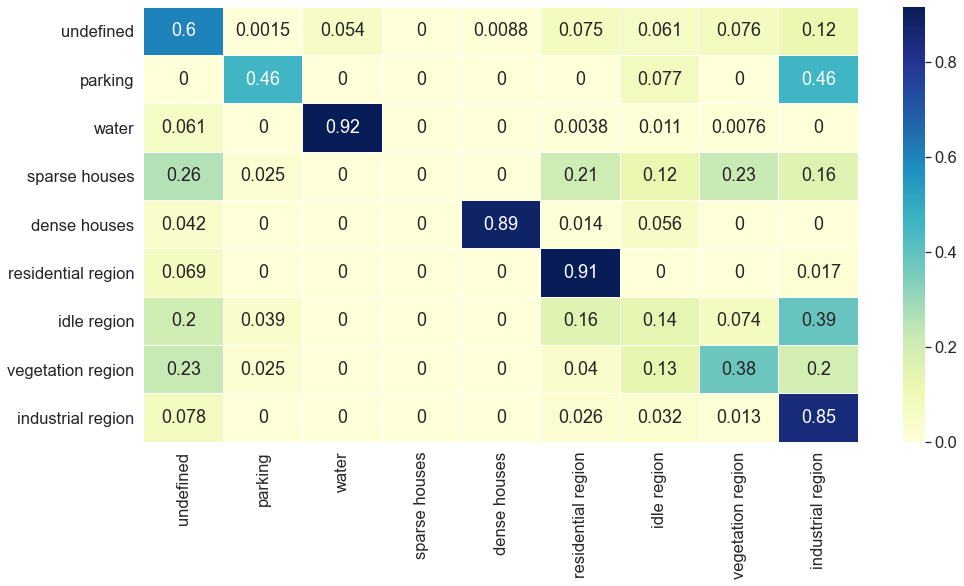

In [13]:
# Confusion Matrix Visualizing

import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.5)
f, ax = plt.subplots(figsize = (16, 8))
svm = sn.heatmap(df_correct_name, annot=True, cmap="YlGnBu", linewidths = 0.05, ax = ax)
figure = svm.get_figure() 
figure.savefig('svm_conf.png', dpi=400)
plt.show()

### 組員名單：
* 106207411 地三土測 李睿莆
* 105207445 地四土測 柯騰達